**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo número ( A )

---


Aluno(a): Alison Pereira Ribeiro 

---

Aluna(o): Leidiane Beatriz Passos Rodrigues

---

Aluno(a): Thiago de Andrade Corrêa 

---

#Especificação do problema : Processamento de Linguagem Natural



Utilizando as técnicas estudadas, desenvolver uma ferramenta que permita a comparação de pequenos textos. Devem ser definidas métricas de comparação que classifique os textos segundo critérios de similaridade.

A ferramenta deverá ser aplicada aos Estudos Dirigidos desenvolvidos ao longo do curso. Para cada estudo, construir uma matriz que mostre a similaridade entre os documentos. Depois, definir um documento de referência e traçar um gráfico de similaridade dos demais em relação a ele.


**Observação**: O trabalho deve ser feito em grupo, mas a avaliação será feita individualmente. Para isso, o grupo deverá fazer um planejamento/cronograma de trabalho e a contribuição de cada membro deverá ser devidamente identificado.


#Planejamento de atividades

Utilizar a ferramenta  [Trello](https://trello.com )  para organizar o trabalho, distribuindo as tarefas e registrando (EXPLICITAMENTE) as interações entre os membros do grupo.

- Eleger um gerente de projeto para organizar as atividades no Trello e coordenar a equipe.
- Planejar o que deve ser feito, distribuindo equitativamente as atividades entre os membros do grupo. Estabelecer atividades a serem feitas, prazos para sua entrega e produtos a serem entregues para cada atividade.

- O planejamento das atividades deve, necessariamente incluir:
  - Cronograma do trabalho a ser realizado.
  - Associação das tarefas a serem realizadas a quem deverá realizá-las.
  - Cada tarefa deve estar associada a um produto a ser entregue.
  - Em todos os dias devem ser atribuídas atividades a todos os membros do grupo.
  
- **O planejamento deve ser entregue na primeira aula em que o tópico for trabalhado**.

O planejamento do trabalho está completo no Trello. 
Ficou assim:

Alison, implementará o modelo que propusermos.
Leidiane, ficará com a descrição do modelo.
Thiago, ficará com a descrição dos resultados.

# Descrição do modelo

   O Processamento de Linguagem Natural (PLN) é a subárea da Inteligência Artificial (IA) que estuda a capacidade e as limitações de uma máquina em entender a linguagem dos seres humanos. O objetivo desse trabalho é comparar as respostas dos 3 últimos  estudos dirigidos e analisar a porcentagem de equivalência das respostas.
   
  Para isso iremos utilizar uma matriz contendo as respostas do último estudo dirigido submetidas pelos alunos da disciplina de Inteligência Artificial,  onde a matriz contém o identificador das questões na coluna, as respostas dos alunos em cada linha e um id na primeira coluna de cada aluno. Essas matriz está organizada da seguinte forma: 
  - coluna: resposta de cada aluno;
  - linhas: pergunta de cada questão.  
  
O modelo consiste em um esquema de comparação de textos, para isso usaremos a frequência das palavras em ambos os textos para fins comparativos, ou seja, um texto será similar a outro se as palavras mais frequentes são iguais. Isso tirando o StopList, isto é, as palavras que servem com para "ligar  o texto", palavras tais como artigos, conjunções, preposições, pontuação, entre outros.
   
  Para esse trabalho iremos começar com a normalização dos dados, convertendo todas as palavras em letras minuscúlas, aplicando a técnica de tokenização que tem como objetivo separar palavras ou sentenças em unidades, utilizando a tokenização lexical que marca cada palavra como um token no texto, identificando-a mesmo se tiver encostada em alguma pontução. 
  Ex: Frase de teste.
  ['Frase' , 'de' , 'teste']
  
  Iremos aplicar a remoção de stopwords método que consiste em remover palavras muito frequentes, tais como “a”, “de”, “o”, “da”, “que”, “e”, “do” entre outras, pois na maioria das vezes não são informações relevantes para a construção do modelo. Iremos remover também o numerais pois não agregam valor semantico para o modelo.
  Por último aplicaremos o processo de stemização, que consiste em reduzir uma palavra ao seu radical, diminuindo ainda mais o vocabulário e a abstração de significado. 
  Assim, faremos uma comparação sintática contando a quantidade de palavras iguais nos textos e analisando o percentual que isso equivale ao texto.
  
  
  

#Implementação

**Observação**: Poderão ser utilizados códigos de outros autores, desde que sejam feitos os devidos créditos aos mesmos. Nesse caso, esses códigos devem ser devidamente documentados, pelo grupo, além da documentação fornecida pelos seus autores. Deve ficar muito claro como o código utilizado foi utilizado para resolver o problema em questão.

In [0]:
#Carregando a base dados

from google.colab import files
uploaded = files.upload()

Saving PLN - Estudo Dirigido 07 - Lógica Fuzzy-SoRespostas.csv to PLN - Estudo Dirigido 07 - Lógica Fuzzy-SoRespostas.csv
Saving PLN - Estudo Dirigido 08 - Algoritmos genéticos-SoRespostas.csv to PLN - Estudo Dirigido 08 - Algoritmos genéticos-SoRespostas.csv
Saving PLN - Estudo dirigido 09 - Processamento de Linguagem Natural-SoRespostas.csv to PLN - Estudo dirigido 09 - Processamento de Linguagem Natural-SoRespostas.csv


In [0]:
import pandas as pd
import numpy as np

dataset_fuzzy = pd.read_csv('PLN - Estudo Dirigido 07 - Lógica Fuzzy-SoRespostas.csv', sep=';')

dataset_ag    = pd.read_csv('PLN - Estudo Dirigido 08 - Algoritmos genéticos-SoRespostas.csv', sep=';')

dataset_nlp   = pd.read_csv('PLN - Estudo dirigido 09 - Processamento de Linguagem Natural-SoRespostas.csv', sep=';')

In [0]:
dataset_fuzzy = dataset_fuzzy.drop('Nome', axis=1)
dataset_fuzzy.head()

,Resposta 1,Resposta 2,Resposta 3,Resposta 4,Resposta 5,Resposta 6,Resposta 7,Resposta 8,Resposta 9,Resposta 10,Resposta 11,Resposta 12,Resposta 13,Resposta 14,Resposta 15,Resposta 16,Resposta 17,Resposta 18,Resposta 19,Resposta 20,Resposta 21,Resposta 22,Resposta 23,Resposta 24
0,"Na lógica clássica, que é frequentemente descr...","Na teoria da probabilidade, estamos lidando co...",Relações fuzzy são uma generalização do concei...,Uma variável linguística é um conceito como “a...,A lógica difusa é usada para raciocinar sobre ...,"Por outro lado, vamos considerar o conjunto de...","Na lógica fuzzy, uma afirmação pode ser tanto ...",Para representar um conjunto difuso em um comp...,"Não é o complemento de A, que contém os elemen...","Um hedge é um qualificador de conjunto difuso,...",Os significados desses modificadores são basta...,A lógica difusa é uma forma de lógica que se a...,"A lógica fuzzy não é monotônica, no sentido de...","Se A e B são valores lógicos difusos, então po...","Claramente, não podemos escrever uma tabela de...",É DEFINIDA DA SEGUINTE FORMA: A → B ≡ MAX ((1 ...,Uma dessas definições é conhecida como implica...,Uma regra difusa tem a forma\n\nIF A = x then ...,"Uma alternativa à implicação de Gödel, chamada...","Para este exemplo simples, assumiremos que a p...","Para usar essa saída difusa, um valor de saída...",A criação do sistema especialista difuso envol...,UM SISTEMA NEURO-FUZZY É UMA REDE NEURAL QUE A...,"Normalmente, uma rede neural difusa é uma rede..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Embora a lógica Aristotélica e a lógica empreg...,Sobe o ponto de vista da probabilidade a inter...,O universo do discurso é o conjunto domínio.,Variáveis linguísticas é um conceito que pode ...,Os conjuntos nítidos podem ser definidos pelos...,Um exemplo seria o conjunto nebuloso de pessoa...,Um enunciado em lógica nebulosa pode ser verda...,Representamos conjunto nebuloso no computador ...,A negação é definida como se segue: sendo PA(x...,Um modificador é um qualificador de um conjunt...,Podemos definir modificadores como “razoavelme...,A lógica nebulosa é uma forma de lógica que se...,Significa dizer que se um novo fato nebuloso f...,"Sejam A e B valores lógicos nebulosos, então p...",Não é possível construir uma tabela verdade co...,Podemos definir a condicional como sendo: A → ...,A implicação de Gödel pode ser definida como: ...,Regras nebulosas são os equivalentes nebulosos...,É uma alternativa a implicação de Gödel é gera...,Suponha que estamos projetando um simples sist...,A desnebulização é o processo de obter um valo...,Passos para criar um sistema especialista nebu...,É um sistema neuronebuloso que aprende a class...,As camadas típicas de uma rede neural nebulosa...
3,"Na lógica aristotélica, há dois valores verdad...","Por exemplo, se um fator tiver valor de probab...",É uma faixa de valores nebulosos que uma variá...,É um conceito que pode ter um valor em uma fai...,Conjuntos nebulosos contrastam com os conjunto...,"Considerando que Bill tem 2,1m de altura, John...","Na lógica nebulosa, uma sentença pode ser verd...",Para representar um conjunto nebuloso em um co...,Dados dois conjuntos nebulosos A e B:\n\nNão A...,Um modificador é um qualificador de um conjunt...,Geralmente um modificador é aplicado elevando ...,Lógica nebulosa é uma forma de lógica que se a...,No sentido de que se um novo fato nebuloso for...,Dados dois conjuntos nebulosos A e B:\n\nConju...,Pois ela teria um número infinito de entradas.,NaN,A → B ≡ (A ≤ B) ∨ B,"A → B ≡ MAX ((1 - A),B)",Permite a um sistema ter valores de entrada de...,NaN,O processo de obter um valor nítido a partir d...,1. Obter informações a partir de um ou mais es...,É uma rede neural que aprende a classificar da...,1 camada de entrada - recebe entradas nítidas\...
4,"Lógica Aristotelica: é uma lógica bivalente, a...","na probabilidade, dado um valor de probabilida...",é o domínio de um determinad

In [0]:
dataset_ag = dataset_ag.drop('Nome', axis=1)
dataset_ag.head()

,Resposta 1,Resposta 2,Resposta 3,Resposta 4,Resposta 5,Resposta 6,Resposta 7,Resposta 8,Resposta 9,Resposta 10,Resposta 11,Resposta 12,Resposta 13,Resposta 14,Resposta 15,Resposta 16,Resposta 17,Resposta 18,Resposta 19,Resposta 20
0,ALGORITMOS GENÉTICOS SÃO UMA FORMA DE BUSCA LO...,TEMOS VISTO VÁRIAS REPRESENTAÇÕES DIFERENTES Q...,A população consiste de um conjunto de cromoss...,O processo para executar um algoritmo genético...,O crossover é o cruzamento entre cromossomos d...,O crossover de um ponto define apenas um ponto...,"A mutação é um operador unário (isto é, é apli...",Normalmente existem duas maneiras em que uma e...,Algoritmos Genéticos parte de uma população in...,Um esquema é uma cadeia de bits que representa...,Tanto a mutação como o crossover podem destrui...,“Esquemas de ordem baixa e curta que são mais ...,A HIPÓTESE DO BLOCO DE CONSTRUÇÃO É UMA CONSEQ...,OS ALGORITMOS GENÉTICOS FUNCIONAM BEM QUANDO U...,"EM ALGUNS PROBLEMAS, ALGUNS BLOCOS CONSTRUTIVO...",Algoritmos genéticos confusos foram desenvolvi...,Escolheremos uma representação que represente ...,Um problema com o algoritmo genético que descr...,"Em muitos sistemas de algoritmos genéticos, a ...",Há fortes evidências empíricas para sugerir qu...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algoritmos genéticos é uma forma de busca loca...,Existem várias representações diferentes que p...,Uma série de bits é conhecida como cromossomo ...,O processo de um algoritmo genético é independ...,O crossover é o processo de cruzamento de crom...,"No crossover de um ponto, um ponto de cruzamen...",O operador de mutação é um operador que foi in...,Normalmente os critérios mais comuns para o en...,Seja f(x) = sin(x). Para encontrar o máximo de...,Um esquema é uma cadeia de bits que representa...,O efeito é que tanto a mutação como o crossove...,O teorema dos esquemas de Holland diz que esqu...,São esquemas curtos de baixa ordem e alta adeq...,Os bits devem ser escolhidos de forma a se agr...,A decepção é um problema enfrentado pelos algo...,Diferente dos algoritmos genéticos padrão os M...,Usando 0 para representar a deserção e 1 para ...,Sem a diversidade algoritmos genéticos não pod...,Os cromossomos podem representar uma possível ...,"Em um mundo sem predadores, há menos pressão p..."
3,Algortimos genéticos são uma forma de de busca...,A representação mais simples para algoritmos g...,"Cromossomos é a cadeia de bits, e cada bit é c...",1. Gere uma população aleatória de cromossomos...,Crossover é usado em sistemas classificadores....,Crossover de ponto único é a forma mais comume...,É um operador unário que é geralmente aplicado...,Há dois meios pelos quais uma execução de um a...,-,O conceito de esquemas foram criados para ofer...,Mutação e crossovers são capazes de de reduzir...,"Que esquemas curtos de baixa ordem, que sejam ...",A hipótese dos blocos de construção é uma cons...,Bits devem ser escolhidos de modo tal que se a...,É um problema enfrentado por algortimos genéri...,"Com os MGAs, um cromossomo não precisa ter um ...",Um cromossomo com 67 1s cooperaria a cada roda...,Diversidade é uma medida útil que é frequentem...,Uma representação de um possível solução do pr...,O efeito é a evolução de comportamentos e habi...
4,Algoritmos genéticos são uma classe particular...,"Cadeia de bits, onde a cadeia de bits é conhec...",População: é um conjunto de cromossomos.Cromos...,1.Gera uma população aleatória de cromossomos ...,É uma operação aplicada entre dois cromossomos...,"Não possuo tempo para responder esta questão, ...","é um operador unário, que aplica uma probabili...","um limite de gerações, ou quando um score dese...",não sei,são padrões encontrados dentro ed cromossomos,-,A given schema can be said to have survivedcro...,"São os cromossomos e genes, que compoem o cpod...",EStou pasasndo mal demais para este questionár...,-,-,-,-,Eles podem representar características/feature...,"Serve como uma seleção natural, ao 

In [0]:
dataset_nlp = dataset_nlp.drop('Nome', axis=1)
dataset_nlp.head()

,Resposta 1,Resposta 2,Resposta 3,Resposta 4,Resposta 5,Resposta 6,Resposta 7,Resposta 8,Resposta 9,Resposta 10,Resposta 11,Resposta 12,Resposta 13,Resposta 14,Resposta 15,Resposta 16,Resposta 17,Resposta 18,Resposta 19,Resposta 20,Resposta 21,Resposta 22,Resposta 23,Resposta 24,Resposta 25,Resposta 26,Resposta 27,Resposta 28,Resposta 29,Resposta 30,Resposta 31,Resposta 32,Resposta 33,Resposta 34,Resposta 35,Resposta 36,Resposta 37,Resposta 38,Resposta 39,Resposta 40
0,As línguas naturais são as línguas usadas pelo...,"Línguas como chinês, finlandês e navajo não tê...",É uma coleção de técnicas usadas para permitir...,A fonologia é o estudo dos sons que compõem as...,Este é o primeiro estágio de análise que é apl...,Esta etapa envolve a aplicação das regras da g...,Isso envolve o exame do significado das palavr...,Esta é a aplicação da compreensão humana às fr...,Os sistemas de processamento de linguagem natu...,A análise morfológica é útil principalmente no...,A análise sintática (parsing) envolve o mapeam...,"São regras gramaticais, frequentemente escrita...",Símbolos de terminal. Cada símbolo de terminal...,"As regras BNF formam um léxico da linguagem, q...",Uma linguagem regular é aquela que pode ser de...,É livre de contexto porque define a gramática ...,Uma gramática livre de contexto pode ter no má...,Uma gramática recursivamente enumerável pode d...,As árvores de análise podem ser construídas de...,Quando uma árvore de análise é construída de c...,Uma rede de transição é um autômato de estado ...,"Uma rede de transição aumentada, ou ATN, é uma...",Para construir uma árvore de análise a partir ...,Para construir uma árvore de análise a partir ...,A semântica é o estudo do significado das pala...,Uma das principais diferenças entre linguagens...,A ambiguidade lexical ocorre quando uma palavr...,A ambiguidade semântica ocorre quando uma sent...,A ambiguidade referencial ocorre quando usamos...,Uma ambigüidade local ocorre quando uma parte ...,O processo pelo qual um sistema de processamen...,Os sistemas de tradução automática foram desen...,O algoritmo de conhecimento é um método comume...,Recuperação de informações envolve a correspon...,A idéia por trás da recuperação da informação ...,O corpus de documentos é claramente muito impo...,O conceito principal usado na recuperação de i...,Stemming é frequentemente aplicado em sistemas...,O sucesso de um sistema de recuperação de info...,"Em geral, para a maioria das técnicas de recup..."
1,As linguagens naturais são as linguagens usada...,Pois uma grande parte da pesquisa em processam...,É o processamento capacitado para processar e ...,Fonologia é o estudo dos sons que compõem pala...,Se trata do primeiro estágio da análise que é ...,Sintaxe determina o papel de cada palavra em u...,Semenatica se trata no ato de examinar o signi...,Pragmática é a aplicação de entendimento de ti...,Porque um sistema pode ter conhecimento detalh...,Análise morfológica é o ato de estudar cada um...,A analise sintatica envolve mapear um fragment...,BNF é amplamente usada por cientistas de compu...,Uma gramática especificada em BNF consiste nos...,Léxico de uma linguagem detalha quais palavras...,São aquelas que pode ser descrita ou reconheci...,Uma gramática é livre de contexto por definir ...,São gramáticas que podem ter mais de um simbol...,Uma gramática irrestrita pode definir qualquer...,Ela podem ser construídas em uma forma de baix...,Árvores de derivação são árvores sintáticas co...,Se trata de um automato de estados finitos que...,Redes de transição aumentada tem a capacidade ...,O analisador por diagrama observaria que as pa...,"O diagrama consiste em vértices e arestas, ond...",A analise semantica envolve elaborar uma repre...,A ambiguidade é o fato de uma sentença poder s...,Se trata de quando uma palavra tem mais de uma...,A ambiguidade semântica ocorre quando uma sent...,Se trata de quando ocorre expressoes anafórica...,A ambiguidade local ocorre quando parte de uma...,Se trata do 

In [0]:
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from string import digits

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [0]:
class Preprocessamento:
    def __init__(self):
        self.dataset = None
        
    def stopwords(self, dataset):
        self.dataset = dataset
        
        dados = []
        
        for i in self.dataset.index:
            texts = list(self.dataset.loc[i])

            if int(texts.count(np.nan)) == 0:
                lista = []
            
            for text in texts:
                if int(texts.count(np.nan)) == 0:

                    stopwords_pt = set(stopwords.words("portuguese"))

                    tokenizer = RegexpTokenizer("[\w']+")

                    token = tokenizer.tokenize(text)

                    words = [w.lower() for w in token if not w.lower() in stopwords_pt]

                    lista.append(" ".join(words))
                    
            
            dados.append(lista)

        return dados
            
    def stemming(self, texts):
        ps = PorterStemmer()
        
        dados = []
        
        for text in texts:
            lista = []

            for sentence in text:
                p = ps.stem(sentence)
                lista.append(p)
            
            dados.append(lista)
            
        return dados
    
    def remove_numeros(self, texts):
        dados = []
        
        for text in texts:
            lista = []
            for sentence in text:
                remove_digits = str.maketrans('', '', digits)
                res = sentence.translate(remove_digits)
                lista.append(res)
            dados.append(lista)
        
        return dados

In [0]:
p = Preprocessamento()

# Pré-processamento dos dados do dataset de Lógica Fuzzy
dados_fuzzy = p.stopwords(dataset_fuzzy)     # Função que remove os stopwords
dados_fuzzy = p.stemming(dados_fuzzy)        # Função que reduz ao radical
dados_fuzzy = p.remove_numeros(dados_fuzzy)  # Função que remove os números das respostas
dados_fuzzy[0]  # Cada posição do vetor corresponde a uma lista de respostas

['lógica clássica frequentemente descrita lógica aristotélica existem dois valores verdade possíveis proposições verdadeiras falsas tais sistemas conhecidos lógicas bivalentes porque envolvem dois valores lógicos lógica empregada raciocínio bayesiano outros modelos probabilísticos bivalente cada fato verdadeiro falso muitas vezes claro dado fato verdadeiro falso probabilidade usada expressar probabilidade determinada proposição torne verdadeira lógica multivalente inicial usada raciocinar sobre princípio incerteza usado física quântica lógica três valores verdadeiro falso indeterminado extensão dessa lógica três valores considerar  representar falso  representar verdadeiro usar números reais   representar graus verdad',
 'teoria probabilidade lidando incerteza momento sabemos proposição verdadeira falsa definitivamente verdadeira falsa ambas nenhuma algo intermediário lógica multivalente certos valor verdade proposição apenas vago verdadeiro falso verdadeiro falso',
 'relações fuzzy ge

In [0]:
# Pré-processamento dos dados do dataset de Algoritmos Genéticos
dados_ag = p.stopwords(dataset_ag)
dados_ag = p.stemming(dados_ag)
dados_ag = p.remove_numeros(dados_ag)
dados_ag[0]  # Cada posição do vetor corresponde a uma lista de respostas

['algoritmos genéticos forma busca local usa métodos baseados evolução fazer pequenas mudanças população cromossomos tentativa identificar solução ótima',
 'visto várias representações diferentes podem ser usadas técnicas evolutivas algoritmos genéticos programação genética usada desenvolver expressões s podem ser usadas programas lisp resolver problemas sistemas classificadores usam cadeia números representam propriedades ambiente símbolos representam respostas propriedades representação simples algoritmos genéticos usada john holland série bits sequência bits conhecida cromossomo cada bit conhecido gene ambos termos emprestados diretamente genética ilustram maneira próxima algoritmos genéticos espelham processos biológico',
 'população consiste conjunto cromossomos cada vimos composto genes cromossomo geralmente usado representar indivíduo completo dentro população outras palavras representação completa solução classificação possível combinar cromossomos juntos formar criaturas refle

In [0]:
# Pré-processamento dos dados do dataset de NLP
dados_nlp = p.stopwords(dataset_nlp)
dados_nlp = p.stemming(dados_nlp)
dados_nlp = p.remove_numeros(dados_nlp)
dados_nlp[0]    # Cada posição do vetor corresponde a uma lista de respostas

['línguas naturais línguas usadas humanos comunicação outras funções distintamente diferentes linguagens formais c java prolog principais diferenças línguas naturais ambíguas significa determinada sentença pode ter significado possível alguns casos significado correto pode ser difícil determinar linguagens formais quase sempre projetadas garantir ambigüidade possa ocorrer portanto determinado programa escrito c pode ter apenas interpretação claramente desejável porque caso contrário computador tomar decisão arbitrária sobre interpretação trabalhar',
 'línguas chinês finlandês navajo têm quase nada comum inglês embora claro finlandês use alfabeto assim sistema pode trabalhar linguagem humana pode necessariamente lidar qualquer outra linguagem humana',
 'coleção técnicas usadas permitir computadores entendam linguagem humana geral preocupados extrair informações gramaticais significados expressões humanas preocupados entender enunciados executar tarefas úteis resultado',
 'fonologia estu

### Método TF-IDF

TF é um documento específico. É uma maneira de marcar a importância das palavras (ou "termos") em um documento com base na frequência com que aparecem. Se uma palavra aparece com frequência em um documento, é importante, que ela recebe uma pontuação alta.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

IDF é para toda a coleção. É uma maneira de marcar quantas vezes uma palavra ocorre em vários documentos. Se uma palavra aparece em vários documentos, ela não é um identificador exclusivo, portanto, obtém uma pontuação mais baixa.

In [0]:
def tfidf_vec(dados):
    vectorizer = TfidfVectorizer(min_df=1)
    v = []
    for lista in dados:
        tfidf = vectorizer.fit_transform(lista)
        v.append((tfidf * tfidf.T).A)
    
    return v

In [0]:
tfidf_fuzzy = tfidf_vec(dados_fuzzy)
tfidf_ag    = tfidf_vec(dados_ag)
tfidf_nlp   = tfidf_vec(dados_nlp)

In [0]:
def cria_conjunto(dados):
    v = []
    for lista in dados:
        l = []
        for vec in lista:
            for i in vec:
                l.append(i)
        v.append(l)
        
    return v

In [0]:
fuzzy = cria_conjunto(tfidf_fuzzy)
ag    = cria_conjunto(tfidf_ag)
nlp   = cria_conjunto(tfidf_nlp)

In [0]:
def similaridade_fuzzy(fuzzy):
    # Como exemplo: verifica a similaridade das repostas do primeiro aluno com os demais
    
    for i in range(0, len(fuzzy)-1):
        similarity = 1 - nltk.cluster.cosine_distance(fuzzy[0], fuzzy[i+1])
        
        plt.plot(i, similarity, 'ro')
          
        print("Similaridade: {:4.2f} %".format(similarity*100))
        
    print("\nMediana: " + str((100+86.37)/2))
    plt.show()

Similaridade: 100.00 %
Similaridade: 95.85 %
Similaridade: 95.85 %
Similaridade: 91.36 %
Similaridade: 96.60 %
Similaridade: 91.66 %
Similaridade: 86.37 %
Similaridade: 95.85 %
Similaridade: 89.55 %
Similaridade: 91.63 %
Similaridade: 89.99 %
Similaridade: 91.98 %
Similaridade: 89.79 %
Similaridade: 91.76 %
Similaridade: 92.18 %
Similaridade: 87.79 %

Mediana: 93.185


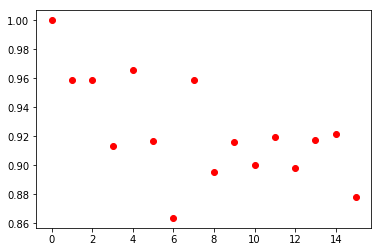

In [0]:
similaridade_fuzzy(fuzzy)

O gráfico acima associa as questões dos testes valor a valor com as respectivas similaridades entre elas. Podemos ver claramente que há uma tendência para valores entre 90 e 96%, indicando alto grau de semelhança entre as respostas.


A mediana foi calculada adicionando o maior e o menor valor e dividindo tudo por dois.

In [0]:
def similaridade_ag(ag):
    # Como exemplo: verifica a similaridade das repostas do primeiro aluno com os demais
    for i in range(0, len(ag)-1):
        similarity = 1 - nltk.cluster.cosine_distance(ag[0], ag[i+1])
        
        plt.plot(i , similarity, 'ro')
        
        print("Similaridade: {:4.2f} %".format(similarity*100))
    print("\nMediana: " + str((100+85.65)/2))
    plt.show()

Similaridade: 100.00 %
Similaridade: 98.12 %
Similaridade: 94.69 %
Similaridade: 81.64 %
Similaridade: 98.49 %
Similaridade: 92.62 %
Similaridade: 94.47 %
Similaridade: 98.11 %
Similaridade: 98.11 %
Similaridade: 96.54 %
Similaridade: 95.60 %
Similaridade: 94.45 %
Similaridade: 95.62 %
Similaridade: 97.42 %
Similaridade: 93.92 %
Similaridade: 96.74 %
Similaridade: 85.65 %

Mediana: 92.825


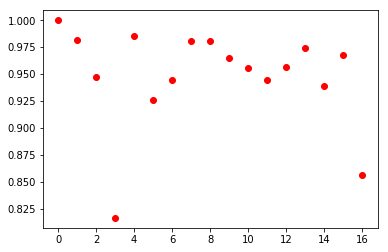

In [0]:
similaridade_ag(ag)

Aqui, houve uma maior semelhança em relação às respostas do anterior. A semelhança ficou entre 92 e 100%.

In [0]:
import matplotlib.pyplot as plt
def similaridade_nlp(nlp):
    # Como exemplo: verifica a similaridade das repostas do primeiro aluno com os demais
    for i in range(0, len(nlp)-1):
        similarity = 1 - nltk.cluster.cosine_distance(nlp[0], nlp[i+1])

        plt.plot(i, similarity, 'ro')

        print("Similaridade: {:4.2f} %".format(similarity*100))

    print("\nMediana: " + str((94.55+69.17)/2))   
    plt.show()

Similaridade: 93.84 %
Similaridade: 93.82 %
Similaridade: 94.55 %
Similaridade: 88.01 %
Similaridade: 93.82 %
Similaridade: 93.21 %
Similaridade: 90.68 %
Similaridade: 93.85 %
Similaridade: 69.17 %
Similaridade: 93.27 %

Mediana: 81.86


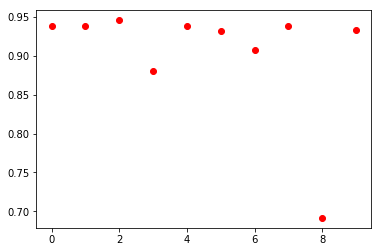

In [0]:
similaridade_nlp(nlp)

A variação apresentada nesse foi a maior de todas, houve questões onde a similaridade ficou em 69%; já em outras ficou 95%. A mediana ficou em 81%.

#Avaliação dos resultados

- O grupo deve avaliar se o modelo (e os dados utilizados) é adequado para tratar o problema proposto.

- Deve ser indicado como  utilizar a solução apresentada para resolver o problema proposto. Isto é, novos alunos devem ser submetidos ao modelo e os resultados apresentados.


O problema proposto envolve a comparação entre diferentes respostas dadas por alunos de graduação na matéria de IA, para perguntas pré-estabelecidas. A fonte de dados era a mesma, ou seja, os alunos tiveram como base o mesmo livro didático.

O modelo que propomos busca as semelhanças entre as respostas e indicam esse nível de similaridade. 

Como vimos nos gráficos acima, as respostas flutuaram no patamar dos 90% de similaridade, uma ou outra questão apresentou variação maior, como no caso de um das respostas do estudo dirigido de NLP. 

Pelo método de comparação entre sentenças usando os n-gramas, função nativa da biblioteca NTKL que usamos aqui, o nível de similaridade foi calculado e apresentado com rigor. Sendo assim, o modelo soluciona de forma eficaz o problema proposto e poderia ser utilizado para resolver problemas semelhantes com igual escala de forma eficiente.

A alta similaridade encontrada pode ser diretamente associada à fonte de dados única para a resolução dos exercícios propostos, ou seja, como as questões eram as mesmas e as respostas eram pontuais no livro, leia-se claras e nítidas, isso pode ter influenciado nessa similaridade encontrada.